# 1. Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("AmesHousing.tsv",sep = '\t')

In [3]:
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
5,6,527105030,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,195500
6,7,527127150,120,RL,41.0,4920,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,213500
7,8,527145080,120,RL,43.0,5005,Pave,NaN,IR1,HLS,...,0,NaN,NaN,NaN,0,1,2010,WD,Normal,191500
8,9,527146030,120,RL,39.0,5389,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,236500
9,10,527162130,60,RL,60.0,7500,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,189000


# 2. First Model
###    2.1 one numerical features

In [4]:
def transform_features(df):
    return df
def select_features(df):
    return df[["Gr Liv Area", "SalePrice"]]
def train_and_test(df):
    train = df[:1460]
    test = df[1460:]    
    numeric_train = train.select_dtypes(include = ['float','integer'])    
    numeric_test = test.select_dtypes(include = ['float','integer'])    
    features = numeric_train.columns.drop('SalePrice')    
    
    # train the model
    lr = LinearRegression()
    lr.fit(train[features],train['SalePrice'])
    pre = lr.predict(test[features])
    mse = mean_squared_error(pre,test['SalePrice'])
    rmse = mse**0.5
    return rmse

In [5]:
df = pd.read_csv("AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)

rmse

57088.25161263909

# 3. Cleaning data
### 3.1 drop columns with more than 10% missing values

In [6]:
df = pd.read_csv("AmesHousing.tsv", delimiter="\t")
cols_missing = df.isnull().sum()
drop_cols = cols_missing[(cols_missing > len(df)/10)]
df = df.drop(drop_cols.index, axis=1)

### 3.2  drop text columns with missing valuse

In [7]:
text_missing = df.select_dtypes(include=['object']).isnull().sum()
drop_cols = text_missing[(text_missing > 0)]
df = df.drop(drop_cols.index, axis=1)

### 3.3 drop useless columns

In [8]:
df = df.drop(["PID", "Order", "Mo Sold", "Sale Condition", "Sale Type"], axis=1)

### 3.4 new feature by learning domain knowledge

In [9]:
df['Year before Sale'] = df['Yr Sold'] - df['Year Built']
df['Year since remod'] = df['Yr Sold'] - df['Year Remod/Add']
df = df[df['Year before Sale'] >= 0]
df = df[df['Year since remod'] >= 0]
df

,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Yr Sold,SalePrice,Year before Sale,Year since remod
0,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,62,0,0,0,0,0,2010,215000,50,50
1,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0,0,0,120,0,0,2010,105000,49,49
2,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,36,0,0,0,0,12500,2010,172000,52,52
3,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,...,0,0,0,0,0,0,2010,244000,42,42
4,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,34,0,0,0,0,0,2010,189900,13,12
5,60,RL,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,36,0,0,0,0,0,2010,195500,12,12
6,120,RL,4920,Pave,Reg,Lvl,AllPub,Inside,Gtl,StoneBr,...,0,170,0,0,0,0,2010,213500,9,9
7,120,RL,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,...,82,0,0,144,0,0,2010,191500,18,18
8,120,RL,5389,Pave,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,...,152,0,0,0,0,0,2010,236500,15,14
9,60,RL,7500,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,60,0,0,0,0,0,2010,189000,11,11


### 3.5 Three ways to deal with numerical columns (mean/median/mode)

In [10]:
num_missing = df.select_dtypes(include=['int','float']).isnull().sum()
fill_cols = num_missing[(num_missing > 0)]
fill_dictionary_mode = df[fill_cols.index].mode().to_dict('records')[0]
fill_dictionary_mean = df[fill_cols.index].mean().to_dict()
fill_dictionary_median = df[fill_cols.index].median().to_dict()

In [11]:
df_mode = df.fillna(fill_dictionary_mode)
df_mean = df.fillna(fill_dictionary_mean)
df_median = df.fillna(fill_dictionary_median)

In [12]:
df_mode.isnull().sum().value_counts()

0    62
dtype: int64

In [13]:
df_mean.isnull().sum().value_counts()

0    62
dtype: int64

In [14]:
df_median.isnull().sum().value_counts()

0    62
dtype: int64

### 3.6 Outputs

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
def transform_features(df):
    cols_missing = df.isnull().sum()
    drop_cols = cols_missing[(cols_missing > len(df)/10)]
    df = df.drop(drop_cols.index, axis=1)
    
    text_missing = df.select_dtypes(include=['object']).isnull().sum()
    drop_cols = text_missing[(text_missing > 0)]
    df = df.drop(drop_cols.index, axis=1)
    
    num_missing = df.select_dtypes(include=['int','float']).isnull().sum()
    fill_cols = num_missing[(num_missing < len(df)/10) & (num_missing > 0)]
    fill_dictionary_mode = df[fill_cols.index].mean().to_dict
    df = df.fillna(fill_dictionary_mode)      
    
    df['Year before Sale'] = df['Yr Sold'] - df['Year Built']
    df['Year since remod'] = df['Yr Sold'] - df['Year Remod/Add']
    df = df[df['Year before Sale'] >= 0]
    df = df[df['Year since remod'] >= 0]
    df = df.drop(["Year Built", "Year Remod/Add", "Yr Sold"], axis = 1)
    df = df.drop(["PID", "Order", "Mo Sold", "Sale Condition", "Sale Type"], axis=1) 
    
    
    return df

def select_features(df):
    return df[["Gr Liv Area", "SalePrice"]]

def train_and_test(df):
    train = df[:1460]
    test = df[1460:]    
    numeric_train = train.select_dtypes(include = ['float','integer'])    
    numeric_test = test.select_dtypes(include = ['float','integer'])    
    features = numeric_train.columns.drop('SalePrice')    
    
    # train the model
    lr = LinearRegression()
    lr.fit(train[features],train['SalePrice'])
    pre = lr.predict(test[features])
    mse = mean_squared_error(pre,test['SalePrice'])
    rmse = mse**0.5
    return rmse

df = pd.read_csv("AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df)

rmse

55275.367312413066

# 4 Feature selection
### 4.1 correlation

In [16]:
corr = abs(df.corr())
corr = corr['SalePrice']
corr = corr[corr > 0.5]
#corr.sort_values()
corr = corr.index
corr

Index(['Overall Qual', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Full Bath',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'SalePrice'],
      dtype='object')

In [17]:
matrix = df[corr].corr()

In [18]:
matrix

,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Total Bsmt SF,1st Flr SF,Gr Liv Area,Full Bath,Garage Yr Blt,Garage Cars,Garage Area,SalePrice
Overall Qual,1.000000,0.597027,0.569609,0.429418,0.547294,0.477837,0.570556,0.522263,0.570569,0.599545,0.563503,0.799262
Year Built,0.597027,1.000000,0.612095,0.313292,0.407526,0.310463,0.241726,0.469406,0.834849,0.537443,0.480131,0.558426
Year Remod/Add,0.569609,0.612095,1.000000,0.196928,0.297481,0.242108,0.316855,0.457266,0.652310,0.425403,0.376438,0.532974
Mas Vnr Area,0.429418,0.313292,0.196928,1.000000,0.397040,0.395736,0.403611,0.260153,0.254784,0.360159,0.373458,0.508285
Total Bsmt SF,0.547294,0.407526,0.297481,0.397040,1.000000,0.800720,0.444675,0.324973,0.347571,0.437608,0.485504,0.632280
1st Flr SF,0.477837,0.310463,0.242108,0.395736,0.800720,1.000000,0.562166,0.371584,0.260170,0.439458,0.491223,0.621676
Gr Liv Area,0.570556,0.241726,0.316855,0.403611,0.444675,0.562166,1.000000,0.630321,0.272848,0.488829,0.484892,0.706780
Full Bath,0.522263,0.469406,0.457266,0.260153,0.324973,0.371584,0.630321,1.000000,0.494397,0.478182,0.407464,0.545604
Garage Yr Blt,0.570569,0.834849,0.652310,0.254784,0.347571,0.260170,0.272848,0.494397,1.000000,0.586731,0.555019,0.526965
Garage Cars,0.599545,0.537443,0.425403,0.360159,0.437608,0.439458,0.488829,0.478182,0.586731,1.000000,0.889676,0.647877


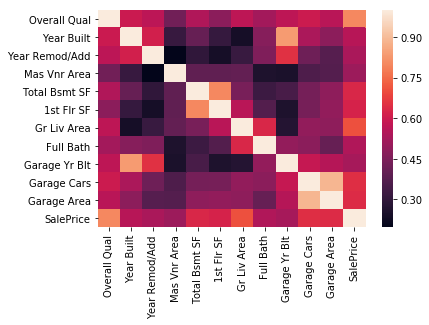

In [19]:
import seaborn as sns
%matplotlib inline
sns.heatmap(matrix)

### 4.2 Nominal

In [20]:
df = pd.read_csv("AmesHousing.tsv", delimiter="\t")
nominal = ['PID','MS SubClass','MS Zoning','Street','Alley','Land Contour','Lot Config','Neighborhood',
          'Condition 1','Condition 2','Bldg Type','House Style','Roof Style','Roof Matl',
        'Mas Vnr Type','Foundation','Heating','Central Air','Garage Type','Misc Feature',
           'Sale Type','Sale Condition']
cols =[]
for col in nominal:
    haha = df[col].value_counts()
    if len(haha) < 10:
        cols.append(col)
if col in cols:
    if col in corr:
        print(col)

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
def transform_features(df):
    cols_missing = df.isnull().sum()
    drop_cols = cols_missing[(cols_missing > len(df)/10)]
    df = df.drop(drop_cols.index, axis=1)
    
    text_missing = df.select_dtypes(include=['object']).isnull().sum()
    drop_cols = text_missing[(text_missing > 0)]
    df = df.drop(drop_cols.index, axis=1)
    
    num_missing = df.select_dtypes(include=['int','float']).isnull().sum()
    fill_cols = num_missing[(num_missing < len(df)/10) & (num_missing > 0)]
    fill_dictionary_mode = df[fill_cols.index].mode().to_dict(orient='records')[0]
    df = df.fillna(fill_dictionary_mode)      
    
    df['Year before Sale'] = df['Yr Sold'] - df['Year Built']
    df['Year since remod'] = df['Yr Sold'] - df['Year Remod/Add']
    df = df[df['Year before Sale'] >= 0]
    df = df[df['Year since remod'] >= 0]
    df = df.drop(["Year Built", "Year Remod/Add", "Yr Sold"], axis = 1)
    df = df.drop(["PID", "Order", "Mo Sold", "Sale Condition", "Sale Type"], axis=1)    
    return df
def select_features(df,correlation_threshold=0.4,unique_threshold=10):
    cols =[]
    # find columns whose correlation with SalePrice more than correlation_threshold
    df_corr = df.corr()
    df_saleprice = df_corr['SalePrice']
    df_saleprice_th_cols = df_saleprice[df_saleprice < correlation_threshold].index
    df = df.drop(df_saleprice_th_cols, axis=1)
        
    # for better model, using uniqueness to delete some useless columns
    nominal = ['PID','MS SubClass','MS Zoning','Street','Alley','Land Contour','Lot Config','Neighborhood',
          'Condition 1','Condition 2','Bldg Type','House Style','Roof Style','Roof Matl',
        'Mas Vnr Type','Foundation','Heating','Central Air','Garage Type','Misc Feature',
           'Sale Type','Sale Condition']
    cols = []
    for col in nominal:
        if col in df.columns:
            if len(df[col].value_counts()) > 10:
                cols.append(col)
    df = df.drop(cols, axis=1)
    
    text_cols = df.select_dtypes(include=['object'])
    for col in text_cols:
        df[col] = df[col].astype('category')
    df = pd.concat([df, pd.get_dummies(df.select_dtypes(include=['category']))], axis=1)
    
    return df

### 4.3 cross validation

In [22]:
def train_and_test(df,k=0):
    numeric_df = df.select_dtypes(include=['integer', 'float'])
    features = numeric_df.columns.drop("SalePrice")
    if k == 0:
        train = df[:1460]
        test = df[1460:]        
        numeric_train = train.select_dtypes(include = ['float','integer'])    
        numeric_test = test.select_dtypes(include = ['float','integer']) 
    
    
        # train the model
        lr = LinearRegression()
        lr.fit(train[features],train['SalePrice'])
        pre = lr.predict(test[features])
        mse = mean_squared_error(pre,test['SalePrice'])
        rmse = mse**0.5
        return rmse
    
    if k == 1:
        shuffled_df = df.sample(frac=1, )
        fold_one = df[:1460]
        fold_two = df[1460:]
        
        numeric_one = fold_one.select_dtype(include=['float','integer'])
        numeric_two = fold_two.select_dtype(include=['float','integer'])
        
                
                
        # train the model on fold one
        lg = LinearRegression()
        lg.fit(numeric_one[features],numeric_one['SalePrice'])
        pre = lg.predict(numeric_two[features])
        mse = mean_squared_error(pre,numeric_two['SalePrice'])
        rmse1 = mse**0.5
        
        # train the model on fold two
        lg = LinearRegression()
        lg.fit(numeric_two[features],numeric_two['SalePrice'])
        pre = lg.predict(numeric_one[features])
        mse = mean_squared_error(pre,numeric_one['SalePrice'])
        rmse2 = mse**0.5
        
        rmse = (rmse1+rmse2)/2
        return rmse
        
    else:
        kf = KFold(n_splits=k, shuffle=True)
        rmse = []
        for train_idx, test_idx in kf.split(df):
            train = df.iloc[train_idx]
            test = df.iloc[test_idx]
            lr = LinearRegression()
            lr.fit(train[features],train['SalePrice'])
            pre = lr.predict(test[features])
            mse = mean_squared_error(pre,test['SalePrice'])
            rmse0 = mse**0.5
            rmse.append(rmse0)
            print(rmse0)
        avg_rmse = sum(rmse)/len(rmse)
        return avg_rmse       
        
  

In [23]:
df = pd.read_csv("AmesHousing.tsv", delimiter="\t")
transform_df = transform_features(df)
filtered_df = select_features(transform_df)
rmse = train_and_test(filtered_df, k=4)

rmse

36040.36253591515
25731.338218060046
25284.384304479623
28937.0482923508


28998.283337701403